In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from konlpy.tag import Okt
from pykospacing import Spacing
from collections import Counter
import random
from tqdm import tqdm, trange
import time
from collections import Counter
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from collections import Counter
import pytagcloud 
import glob  
import sys
import openpyxl
from PIL import Image

### 데이터 파일 합치기

In [2]:
DATA_IN_PATH="C:/python/yes24/" #최윤지 깃허브 경로
FileName='yes_url_'
df1=pd.read_csv(DATA_IN_PATH+FileName+'01.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df1))
df2=pd.read_csv(DATA_IN_PATH+FileName+'02.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df2))
df3=pd.read_csv(DATA_IN_PATH+FileName+'03.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df3))
df4=pd.read_csv(DATA_IN_PATH+FileName+'04.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df4))
df5=pd.read_csv(DATA_IN_PATH+FileName+'05.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df5))
df6=pd.read_csv(DATA_IN_PATH+FileName+'06.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df6))
df7=pd.read_csv(DATA_IN_PATH+FileName+'07.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df7))
df8=pd.read_csv(DATA_IN_PATH+FileName+'08.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df8))
df9=pd.read_csv(DATA_IN_PATH+FileName+'09.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df9))
df10=pd.read_csv(DATA_IN_PATH+FileName+'10.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df10))
df11=pd.read_csv(DATA_IN_PATH+FileName+'11.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df11))
df12=pd.read_csv(DATA_IN_PATH+FileName+'12.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df12))
df13=pd.read_csv(DATA_IN_PATH+FileName+'13.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df13))


21
15
69
41
8
55
45
13
57
7
65
7
1


In [4]:
import pandas as pd
from glob import glob

file_names = glob("C:/python/yes24/*.csv") #폴더 내의 모든 csv파일 목록을 불러온다
total = pd.DataFrame() #빈 데이터프레임 하나를 생성한다

for file_name in file_names:
    temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
    total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

total.to_csv("C:/python/yes24/total.csv")


C:\Users\nirae\AppData\Local\Temp\ipykernel_171360\3856532443.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
C:\Users\nirae\AppData\Local\Temp\ipykernel_171360\3856532443.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
C:\Users\nirae\AppData\Local\Temp\ipykernel_171360\3856532443.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and

In [5]:
df=pd.read_csv("C:/python/yes24/yes24_review_total.csv",header=0,sep=',') #quoting=3 쌍따옴표 무시
print(len(df))

404


### 전처리 데이터 크롤링


In [103]:
DATA_IN_PATH="C:/Users/nirae/Desktop/주간프로젝트 깃허브 폴더(최종)/크롤링/data/" #최윤지 깃허브 경로

FileName='yes24_review_total'

In [104]:
df=pd.read_csv(DATA_IN_PATH+FileName+'.csv',header=0,sep=',') #quoting=3 쌍따옴표 무시
df.head()

,Unnamed: 0,Review
0,0,기대보다 웹툰에서 전투신이라던가 캐릭터들의 매력 그리고 몹들까지 잘 살린거 같아서 ...
1,1,전지적 독자 시점 1권 초판 한정 부록 포함입니다이제 막 시작되는 부분이라 엥......
2,2,"""에이템포미디어에서 출간 된 싱숑 작가님의 작품을 슬리피-C 작가님이 웹툰화한 작품..."
3,3,"""전지적 독자시점 1권 싱숑원작 작품입니다.주위의 추천으로 구매하게 된 책입니다.엄..."
4,4,"""원작이 한창 연재 중에는 소문만 들었다가 완결 난 뒤에 친구의 추천으로 읽게 된 ..."


In [105]:
#데이터개수
print('데이터개수:{}'.format(len(df)))

데이터개수:404


In [106]:
#각 리뷰의 문자 길이 분포
df_length=df['Review'].apply(len)
df_length.head()

0    206
1    297
2    222
3    195
4    211
Name: Review, dtype: int64

Text(0, 0.5, 'Number of Review')

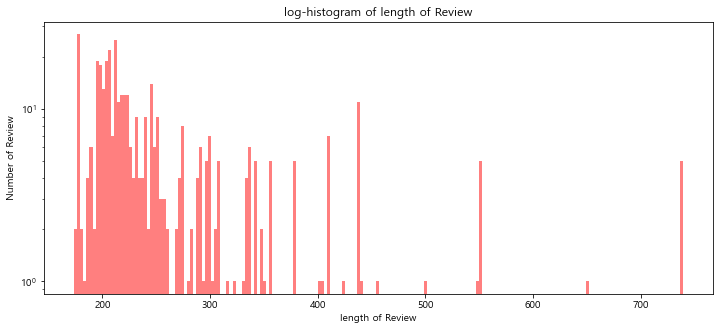

In [107]:
plt.figure(figsize=(12,5))#그래프 이미지 사이즈 선언
plt.hist(df_length,bins=200, color='r',alpha=0.5, label='word') #히스토그램
plt.yscale('log')
plt.title('log-histogram of length of Review')
plt.xlabel('length of Review')
plt.ylabel('Number of Review')


#############
#YES 24 리뷰문자 길이는 평균적으로 300이하가 많음
#############


In [108]:
print('리뷰문자 최소 길이:{}'.format(np.min(df_length)))
print('리뷰문자 최대 길이:{}'.format(np.max(df_length))) 
print('리뷰문자 평균 길이:{:.2f}'.format(np.mean(df_length)))
print('리뷰문자 표준 편차 길이:{:.2f}'.format(np.std(df_length)))
print('리뷰문자 중앙값:{}'.format(np.median(df_length)))
print('리뷰문자 1사분위 길이:{}'.format(np.percentile(df_length,25)))
print('리뷰문자 3사분위 길이:{}'.format(np.percentile(df_length,75)))

리뷰문자 최소 길이:174
리뷰문자 최대 길이:739
리뷰문자 평균 길이:257.77
리뷰문자 표준 편차 길이:94.12
리뷰문자 중앙값:222.5
리뷰문자 1사분위 길이:204.0
리뷰문자 3사분위 길이:275.75


(-0.5, 799.5, 399.5, -0.5)

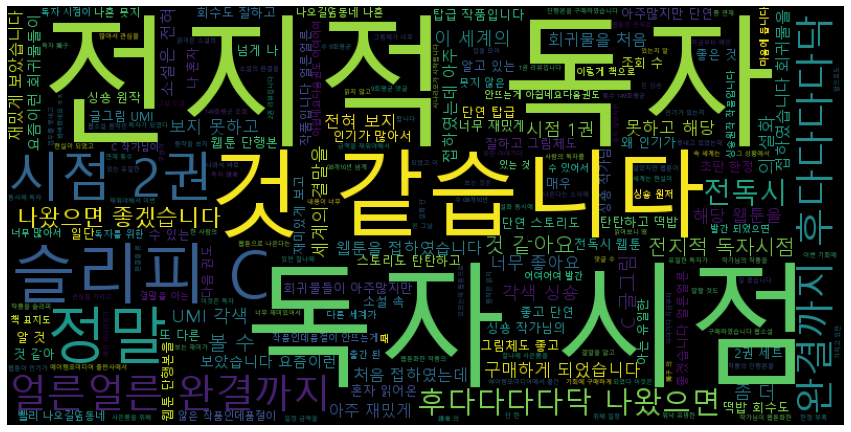

In [109]:
cloud = WordCloud(font_path='malgun', width=800, height=400).generate("".join(df['Review']))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')


In [110]:
df.isnull().sum()

Unnamed: 0    0
Review        0
dtype: int64

In [111]:
#한글, 숫자 표현만 남기기
def extract_word(text):
    hangul = re.compile('[^0-9가-힣]') 
    result = hangul.sub(' ', text) 
    return result

In [112]:
print("Before Extraction : ",df['Review'][96])
print("After Extraction : ", extract_word(df['Review'][96]))

print("Before Extraction : ",df['Review'][103])
print("After Extraction : ", extract_word(df['Review'][103]))

Before Extraction :  처음 보는 책인데 인기 있어서 구매해 봤어요. 근데 연출이나 그림체가 확실히 좋더군요. 인터넷 연재 중인 웹툰을 단행본으로 내면 어색하거나 잘못 편집하는 경우가 많은데 출판사 측에서 많이 신경을 썼는지 크게 거슬리는 부분도 없었습니다. 갠적으로 여캐 등장하는 걸 좋아하는데 후속권에는 많이 나오면 좋겠네요. 중요하다던 그 캐릭터도 등장하길 기대하고 있습니다.
After Extraction :  처음 보는 책인데 인기 있어서 구매해 봤어요  근데 연출이나 그림체가 확실히 좋더군요  인터넷 연재 중인 웹툰을 단행본으로 내면 어색하거나 잘못 편집하는 경우가 많은데 출판사 측에서 많이 신경을 썼는지 크게 거슬리는 부분도 없었습니다  갠적으로 여캐 등장하는 걸 좋아하는데 후속권에는 많이 나오면 좋겠네요  중요하다던 그 캐릭터도 등장하길 기대하고 있습니다 
Before Extraction :  "시간을 맞춰서 주문한 한정판입니다. 긴 기다림 끝에 받아서 정말 흡족합니다. 인쇄도 잘 되었고 편집도 만족합니다. 동봉된 인물카드 6장도 질이 괜찮고요. 기대했던 폰 스트랩이 조금 튼튼하지 않아서 실 사용은 안 하고 보관만 하려고 합니다. 원작의 종이책보다도 웹툰이 먼저 나왔다는 게 조금 안타깝지만요. 좋은 퀄로 나올 거라서 늦는다고 스스로 납득하고 있습니다. 양장본으로 나올 거라 믿습니다. 웹툰의 몰입감이 잘 편집되어 있어서 좋았습니다. 주문할 때에 혹시나 폰 스트랩을 놓치지 않을까 염려되어서 대기까지 했는데요. 예스 쪽 창이 일반판과 한정판을 구분이 가지 않게 되어 있어서 주문할 때 번거로움이 있었습니다. 혹시나 싶어서 결제창을 살펴봤더니 일반판을 주문했더라고요. 그나마 초반에 확인해서 일반판을 취소하고 한정판으로 재주문이 가능했지, 만약에 매진되었더라면 어쨌을까 싶습니다. 저처럼 취소하고 재주문하신 분들 제법 많았을 겁니다. 다음부터는 이런 부분을 신경 좀 써주시길 바랍니다."
After Extraction :   시간을 맞춰서 주문한 한

In [113]:
df['Review'] = df['Review'].apply(lambda x:extract_word(x))

In [114]:
# #띄어쓰기 고치기  pykospacing  모델 사용
# spacing = Spacing()
# print("Before Fixing : ",df['Review'][9])
# print("After Fixing : ", spacing(df['Review'][9]))
# print("Before Fixing : ",df['Review'][10])
# print("After Fixing : ", spacing(df['Review'][10]))


In [115]:
# df['Review'] = df['Review'].apply(lambda x:spacing(x)) #띄어쓰기 고치기 전체 적용

In [116]:
start = time.time()

okt = Okt()
words = " ".join(df['Review'].tolist())
words = okt.morphs(words,stem=True)

print("time :", time.time() - start)

time : 4.890782356262207


In [117]:
count=Counter(words)

print(count)


Counter({'이': 1217, '하다': 1176, '도': 738, '을': 643, '웹툰': 557, '가': 551, '있다': 546, '권': 524, '보다': 515, '나오다': 460, '좋다': 447, '에': 438, '의': 409, '으로': 393, '은': 384, '독자': 368, '소설': 333, '되다': 323, '것': 299, '읽다': 296, '너무': 276, '들': 272, '이다': 271, '구매': 270, '책': 262, '단행본': 227, '같다': 226, '시점': 224, '로': 219, '전지적': 217, '를': 214, '1': 211, '는': 204, '자다': 196, '그림': 183, '되어다': 179, '원작': 178, '않다': 170, '까지': 166, '에서': 155, '2': 153, '다': 143, '한': 140, '그': 139, '작품': 137, '하고': 131, '고': 125, '내용': 123, '인': 121, '3': 120, '정말': 118, '전독시': 118, '들다': 117, '재밌다': 116, '생각': 116, '다음': 113, '더': 111, '이라': 111, '못': 110, '싱숑': 109, '소장': 109, '완결': 107, '수': 106, '많다': 103, '만': 103, '나': 102, '없다': 101, '요': 96, '표지': 93, '리뷰': 92, '보고': 90, '과': 89, '이야기': 89, '님': 88, '작가': 87, '싶다': 85, '연재': 82, '캐릭터': 81, '안': 81, '아니다': 78, '부터': 78, '때': 77, '체': 77, '좋아하다': 75, '사람': 75, '알': 74, '저': 74, '제': 74, '진짜': 73, '만화': 72, '적': 72, '세계': 72, '거': 71, '초판': 70, '기대': 69,

In [118]:
#한 글자, 불용어 제거 
remove_one_word = [x for x in words if len(x)>1 or x=="글"]
len(remove_one_word)

25221

In [119]:
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

14452

In [120]:
Counter(remove_stopwords).most_common()

[('웹툰', 557),
 ('독자', 368),
 ('소설', 333),
 ('구매', 270),
 ('단행본', 227),
 ('시점', 224),
 ('전지적', 217),
 ('그림', 183),
 ('원작', 178),
 ('작품', 137),
 ('내용', 123),
 ('전독시', 118),
 ('재밌다', 116),
 ('싱숑', 109),
 ('소장', 109),
 ('완결', 107),
 ('표지', 93),
 ('리뷰', 92),
 ('이야기', 89),
 ('작가', 87),
 ('연재', 82),
 ('캐릭터', 81),
 ('좋아하다', 75),
 ('사람', 75),
 ('만화', 72),
 ('세계', 72),
 ('초판', 70),
 ('기대', 69),
 ('재미있다', 69),
 ('주인공', 67),
 ('빨리', 66),
 ('기다리다', 64),
 ('작화', 63),
 ('마음', 63),
 ('슬리피', 62),
 ('카드', 60),
 ('아쉽다', 58),
 ('각색', 58),
 ('글', 56),
 ('구성', 56),
 ('인기', 55),
 ('처음', 52),
 ('종이', 51),
 ('부록', 48),
 ('궁금하다', 48),
 ('스토리', 47),
 ('웹소설', 45),
 ('기대하다', 45),
 ('시작', 44),
 ('그리다', 44),
 ('취향', 43),
 ('모으다', 42),
 ('추천', 40),
 ('회귀', 40),
 ('살리다', 39),
 ('다르다', 39),
 ('새롭다', 39),
 ('판타지', 39),
 ('미디어', 38),
 ('예쁘다', 38),
 ('세트', 37),
 ('김독자', 37),
 ('에이템포', 36),
 ('인물', 36),
 ('재질', 36),
 ('현실', 35),
 ('상상', 34),
 ('구입', 34),
 ('얼른얼른', 34),
 ('전개', 33),
 ('사다', 33),
 ('초반', 32),
 ('한정판', 32),
 

In [121]:
#최소 횟수 이하 단어 확인 (20개이하)
for item, count in Counter(remove_stopwords).most_common():
    if count==21:
        print(item)

야하다
빠지다
설화
해주다
출판사


In [122]:
from tqdm import tqdm, trange

#20개 이하 제거

minimum_count = 21
more_than_one_time= []
for i in tqdm(range(len(remove_stopwords))):
    tmp = remove_stopwords[i]
    if remove_stopwords.count(tmp) >= minimum_count:
        more_than_one_time.append(tmp)

100%|██████████████████████████████████████████████████████████████████████████| 14452/14452 [00:08<00:00, 1651.25it/s]


In [123]:
Counter(more_than_one_time).most_common()

[('웹툰', 557),
 ('독자', 368),
 ('소설', 333),
 ('구매', 270),
 ('단행본', 227),
 ('시점', 224),
 ('전지적', 217),
 ('그림', 183),
 ('원작', 178),
 ('작품', 137),
 ('내용', 123),
 ('전독시', 118),
 ('재밌다', 116),
 ('싱숑', 109),
 ('소장', 109),
 ('완결', 107),
 ('표지', 93),
 ('리뷰', 92),
 ('이야기', 89),
 ('작가', 87),
 ('연재', 82),
 ('캐릭터', 81),
 ('좋아하다', 75),
 ('사람', 75),
 ('만화', 72),
 ('세계', 72),
 ('초판', 70),
 ('기대', 69),
 ('재미있다', 69),
 ('주인공', 67),
 ('빨리', 66),
 ('기다리다', 64),
 ('작화', 63),
 ('마음', 63),
 ('슬리피', 62),
 ('카드', 60),
 ('아쉽다', 58),
 ('각색', 58),
 ('글', 56),
 ('구성', 56),
 ('인기', 55),
 ('처음', 52),
 ('종이', 51),
 ('부록', 48),
 ('궁금하다', 48),
 ('스토리', 47),
 ('웹소설', 45),
 ('기대하다', 45),
 ('시작', 44),
 ('그리다', 44),
 ('취향', 43),
 ('모으다', 42),
 ('추천', 40),
 ('회귀', 40),
 ('살리다', 39),
 ('다르다', 39),
 ('새롭다', 39),
 ('판타지', 39),
 ('미디어', 38),
 ('예쁘다', 38),
 ('세트', 37),
 ('김독자', 37),
 ('에이템포', 36),
 ('인물', 36),
 ('재질', 36),
 ('현실', 35),
 ('상상', 34),
 ('구입', 34),
 ('얼른얼른', 34),
 ('전개', 33),
 ('사다', 33),
 ('초반', 32),
 ('한정판', 32),
 

In [124]:
def save_and_load(dataframe):
    DATA_IN_PATH="C:/Users/nirae/Desktop/주간프로젝트 깃허브 폴더(최종)/크롤링/data/" #최윤지 깃허브 경로
    FileName='yes24_review_total'
    dataframe.to_csv(DATA_IN_PATH+FileName+'.csv',header=0,sep=',')
    df=pd.read_csv(DATA_IN_PATH+FileName+'.csv',header=0,sep=',')
    df = df.dropna()
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

In [125]:
def load_stopwords():
    with open('stopwords.txt', 'r') as f:
        list_file = f.readlines()
    return list_file[0].split(",")

In [126]:
#한글, 숫자 표현만 남기기
def extract_word(text):
    hangul = re.compile('[^0-9가-힣]') 
    result = hangul.sub(' ', text) 
    return result

In [127]:
def make_wordlist(reviews,stopwords): #reviews = " ".join(data['Review'].tolist())
    print("리뷰들을 모아 분석하는 중입니다.....")
    #정규표현식 적용
    print("데이터 정제 중....")
    words = extract_word(reviews)
    #형태소 추출
    print("형태소 추출 중....")
    words = okt.morphs(words,stem=True)
    #한글자 제거
    print("한글자 제거 중....")
    words = [x for x in words if len(x)>1 or x=="글"]
    #불용어 제거
    print("불용어 제거 중....")
    words = [x for x in remove_one_word if x not in stopwords]
    #최소횟수 미만 제거
    print("의미있는 단어리스트 생성 중....")
    time.sleep(1)
    minimum_count = 20
    final = []
    for i in tqdm(range(len(words))):
        tmp = words[i]
        if words.count(tmp) >= minimum_count:
            final.append(tmp)
    return set(final) #조건을 만족하는 단어 리스트

In [128]:
def preprocess(text, word_list):
    text = extract_word(text)
    okt = Okt()
    text = okt.morphs(text, stem = True)
    text = [x for x in text if x in word_list]
    return text

In [129]:
word_lst=make_wordlist("".join(df['Review'].tolist()),stopwords)

리뷰들을 모아 분석하는 중입니다.....
데이터 정제 중....
형태소 추출 중....
한글자 제거 중....
불용어 제거 중....
의미있는 단어리스트 생성 중....


100%|██████████████████████████████████████████████████████████████████████████| 14452/14452 [00:08<00:00, 1699.47it/s]


In [130]:
Counter(more_than_one_time).most_common()

[('웹툰', 557),
 ('독자', 368),
 ('소설', 333),
 ('구매', 270),
 ('단행본', 227),
 ('시점', 224),
 ('전지적', 217),
 ('그림', 183),
 ('원작', 178),
 ('작품', 137),
 ('내용', 123),
 ('전독시', 118),
 ('재밌다', 116),
 ('싱숑', 109),
 ('소장', 109),
 ('완결', 107),
 ('표지', 93),
 ('리뷰', 92),
 ('이야기', 89),
 ('작가', 87),
 ('연재', 82),
 ('캐릭터', 81),
 ('좋아하다', 75),
 ('사람', 75),
 ('만화', 72),
 ('세계', 72),
 ('초판', 70),
 ('기대', 69),
 ('재미있다', 69),
 ('주인공', 67),
 ('빨리', 66),
 ('기다리다', 64),
 ('작화', 63),
 ('마음', 63),
 ('슬리피', 62),
 ('카드', 60),
 ('아쉽다', 58),
 ('각색', 58),
 ('글', 56),
 ('구성', 56),
 ('인기', 55),
 ('처음', 52),
 ('종이', 51),
 ('부록', 48),
 ('궁금하다', 48),
 ('스토리', 47),
 ('웹소설', 45),
 ('기대하다', 45),
 ('시작', 44),
 ('그리다', 44),
 ('취향', 43),
 ('모으다', 42),
 ('추천', 40),
 ('회귀', 40),
 ('살리다', 39),
 ('다르다', 39),
 ('새롭다', 39),
 ('판타지', 39),
 ('미디어', 38),
 ('예쁘다', 38),
 ('세트', 37),
 ('김독자', 37),
 ('에이템포', 36),
 ('인물', 36),
 ('재질', 36),
 ('현실', 35),
 ('상상', 34),
 ('구입', 34),
 ('얼른얼른', 34),
 ('전개', 33),
 ('사다', 33),
 ('초반', 32),
 ('한정판', 32),
 

In [131]:
count=Counter(more_than_one_time)
print(count)

Counter({'웹툰': 557, '독자': 368, '소설': 333, '구매': 270, '단행본': 227, '시점': 224, '전지적': 217, '그림': 183, '원작': 178, '작품': 137, '내용': 123, '전독시': 118, '재밌다': 116, '싱숑': 109, '소장': 109, '완결': 107, '표지': 93, '리뷰': 92, '이야기': 89, '작가': 87, '연재': 82, '캐릭터': 81, '좋아하다': 75, '사람': 75, '만화': 72, '세계': 72, '초판': 70, '기대': 69, '재미있다': 69, '주인공': 67, '빨리': 66, '기다리다': 64, '작화': 63, '마음': 63, '슬리피': 62, '카드': 60, '아쉽다': 58, '각색': 58, '글': 56, '구성': 56, '인기': 55, '처음': 52, '종이': 51, '부록': 48, '궁금하다': 48, '스토리': 47, '웹소설': 45, '기대하다': 45, '시작': 44, '그리다': 44, '취향': 43, '모으다': 42, '추천': 40, '회귀': 40, '살리다': 39, '다르다': 39, '새롭다': 39, '판타지': 39, '미디어': 38, '예쁘다': 38, '세트': 37, '김독자': 37, '에이템포': 36, '인물': 36, '재질': 36, '현실': 35, '상상': 34, '구입': 34, '얼른얼른': 34, '전개': 33, '사다': 33, '초반': 32, '한정판': 32, '세상': 31, '매력': 30, '유명하다': 30, '잘생기다': 30, '네이버': 29, '소장용': 29, '기분': 29, '얼른': 29, '유중혁': 28, '유일하다': 28, '느끼다': 27, '한정': 27, '편집': 27, '에디션': 27, '즐겁다': 26, '결말': 26, '중혁': 26, '탄탄하다': 26, '드디어': 26, '벌레': 

In [132]:
# tag2=count.most_common()
# taglist=pytagcloud.make_tags(tag2, maxsize=200)  # tag2데이터로 태그 생성
# print(taglist)


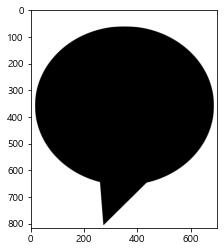

In [137]:
icon = Image.open('wc copy.png')    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


<Figure size 432x288 with 0 Axes>

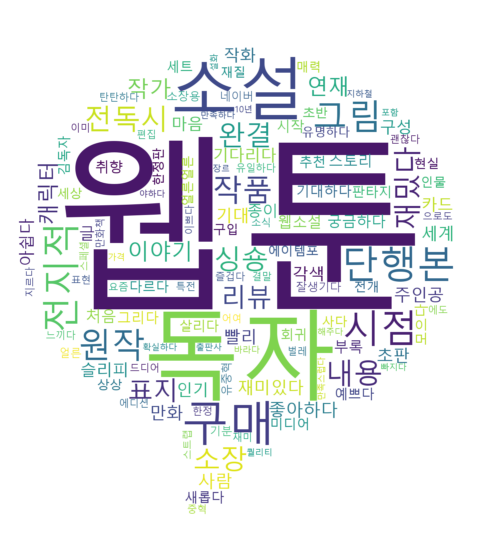

<Figure size 432x288 with 0 Axes>

In [138]:
wc = WordCloud(font_path='malgun', 
               background_color='white',
#                colormap='Greens',
               width=1000, 
               height=1000, 
               scale=2.0, 
               max_font_size=300, 
               mask=mask)
gen = wc.generate_from_frequencies(count)
plt.figure(figsize=(10,10))       
plt.axis('off') 
plt.imshow(wc,interpolation='bilinear')
plt.figure()

In [140]:
gen.to_file('yes_24(okt).png')

In [26]:
key_word='평균'
test = df[df['Review'].str.contains(key_word)]
#a=test.sample(frac=0.05) #원하는 % 만큼 추출
a=test.sample(n=10) #원하는 개수만큼 추출
print(a)

     Unnamed: 0                                             Review
253          44   드디어 전지적 독자 시점이 웹소설에서만 볼 수가 있었는데 이제는 만화책으로 출판이...
395          64   드디어 전지적 독자 시점이 웹소설에서만 볼 수가 있었는데 이제는 만화책으로 출판이...
88           52    누적 조회 수 1억 뷰 레전드 판타지 웹 소설 마침내 웹툰으로 총 연재 횟수 3...
142          37   드디어 전지적 독자 시점이 웹소설에서만 볼 수가 있었는데 이제는 만화책으로 출판이...
153           7                   총 연재 횟수 3 149회평균 조회 수 1 9회평균 ...
323          56   드디어 전지적 독자 시점이 웹소설에서만 볼 수가 있었는데 이제는 만화책으로 출판이...
381          50                   총 연재 횟수 3 149회평균 조회 수 1 9회평균 ...
20           20   드디어 전지적 독자 시점이 웹소설에서만 볼 수가 있었는데 이제는 만화책으로 출판이...
239          30                   총 연재 횟수 3 149회평균 조회 수 1 9회평균 ...
309          42                   총 연재 횟수 3 149회평균 조회 수 1 9회평균 ...
